In [2]:
from helpers import potential_list
from pyiron_atomistics import Project

In [3]:
import matplotlib.pyplot as plt
import numpy as np

## Aluminium

In [4]:
pr = Project('lial_thermodynamics')

In [5]:
al_sol = pr.create.job.Calphy("tm_al_sol")

In [6]:
al_sol.potential = potential_list[0]

In [6]:
al_sol.structure = pr.create.structure.ase.bulk('Al', cubic=True).repeat(5)

In [7]:
al_sol.calc_free_energy(temperature=[800, 1100], 
                     pressure=0, 
                     reference_phase="solid")
al_sol.run()

2022-05-06 07:41:38,943 - pyiron_log - WARNING - The job tm_al_sol is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'


In [9]:
al_lqd = pr.create.job.Calphy("tm_al_lqd")
al_lqd.structure = al_sol.structure
al_lqd.potential = potential_list[0]

In [10]:
al_lqd.server.cores = 4

In [11]:
al_lqd.calc_free_energy(temperature=[800, 1100], 
                     pressure=0, 
                     reference_phase="liquid")
al_lqd.run()

2022-05-06 07:45:26,856 - pyiron_log - WARNING - The job tm_al_lqd is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'


Text(0, 0.5, 'Temperature (K)')

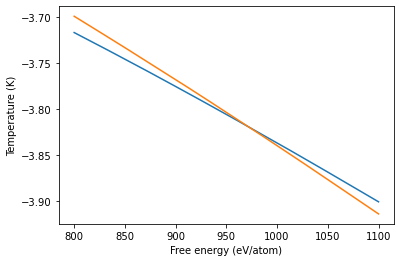

In [12]:
plt.plot(al_sol.output.temperature, al_sol.output.energy_free, label="solid")
plt.plot(al_lqd.output.temperature, al_lqd.output.energy_free, label="liquid")
plt.xlabel("Free energy (eV/atom)")
plt.ylabel("Temperature (K)")

## Lithium

In [23]:
li_sol = pr.create.job.Calphy("tm_li_sol3", delete_aborted_job=True, delete_existing_job=True)

In [24]:
li_sol.potential = potential_list[1]
li_sol.structure = pr.create.structure.ase.bulk('Li', cubic=True).repeat(5)
li_sol.server.cores = 4

In [25]:
li_sol.calc_free_energy(temperature=[400, 500], 
                     pressure=0, 
                     reference_phase="solid")
li_sol.run()

/home/users/menonsqr/miniconda3/envs/pyiron-dev/lib/python3.10/site-packages/h5io/_h5io.py:56: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['Name', 'Filename', 'Model', 'Species', 'Config'], dtype='object')]

  data.to_hdf(fname, rootpath)


The job tm_li_sol3 was saved and received the ID: 82


MeltedError: System melted, increase size or reduce scaling!

In [ ]:
li_lqd = pr.create.job.Calphy("tm_li_lqd3")
li_lqd.structure = li_sol.structure
li_lqd.potential = potential_list[1]
li_lqd.server.cores = 4

In [ ]:
li_lqd.calc_free_energy(temperature=[500, 700], 
                     pressure=0, 
                     reference_phase="liquid")
li_lqd.run()

In [ ]:
plt.plot(li_sol.output.temperature, li_sol.output.energy_free, label="solid")
plt.plot(li_lqd.output.temperature, li_lqd.output.energy_free, label="liquid")
plt.xlabel("Free energy (eV/atom)")
plt.ylabel("Temperature (K)")

In [ ]:
arg = np.argsort(np.abs(li_sol.output.energy_free-li_lqd.output.energy_free))[0]
li_sol.output.temperature[arg]